This project is to build a Deep Learning model to classify the fashion items that are in the form of images from the MNIST dataset.

For this project, CNN was used to build the model. Further explanation will be seen in this notebook.

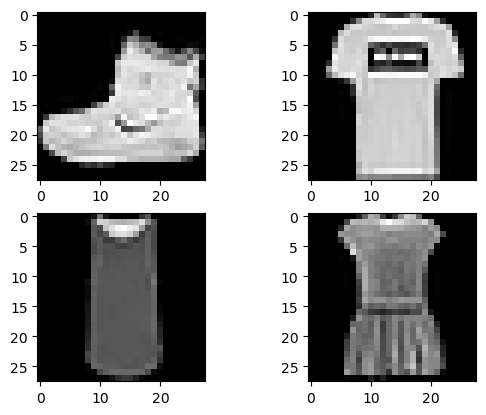

In [366]:
import numpy
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Creating subplots to visualize images
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Some sample pictures from the Fashion MNIST dataset was loaded for observation.

For this project, we will convert the images into gray. The reason is because the outline/shape of each fashion item would have a greater impact in training the model.

In [367]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


# Finding out the number of possible fashion item types
print(len(set(y_train)))

# one hot encode outputs based on the number of possible fashion item types
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Assigning the number of columns after applying one hot encode to verify the number of fashion item types
num_classes = y_test.shape[1]

10


After converting the images to gray, we normalized the inputs by dividing by 255.

Also, we observed that there are a total of 10 unique types of Fashion items.

In [280]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [368]:
learning_rate = [0.2, 0.01]
dropout_rate = [0.3, 0.2, 0.5]

Listing out possible values for learning rate and dropout rate as parameters for hypertuning afterwards.

In [369]:
def build_model(optimizer='adam',learning_rate=0.2, dropout_rate=0.2):
    keras.backend.clear_session()
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

As Regular Neural Nets (RNN) don’t scale well with full images, CNN was selected for this project for image classification task.

The benefit of using CNN for this task is:
1) ConvNet layers have neurons arranged in 3 dimensions (width, height, depth - i.e. w x h x colours)
2) By using CNN, the neurons in a layer connects to a small region of the layer before it rather than all neurons fully connected. 

In [370]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import pprint

# Creat the wrapper and pass params to RandomizedSearchCV 
# parameters is a dict with all values

parameters = dict(learning_rate = learning_rate,
                  dropout_rate = dropout_rate)

model = KerasClassifier(build_fn=build_model, dropout_rate=0.2, learning_rate=0.2, verbose=0)

models = RandomizedSearchCV(estimator = model, param_distributions=parameters, n_jobs=1)

Using RandomizedSearchCV to iterate through the different parameters of learning rate and dropout rate to find the best parameters for best model accuracy.

In [371]:
import warnings
warnings.filterwarnings('ignore')
tf.autograph.set_verbosity(0)

best_model = models.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)

In [372]:
print('Best model :')
print(best_model.best_params_)

Best model :
{'learning_rate': 0.2, 'dropout_rate': 0.5}


In [373]:
# Building new model with the best parameters after hyper tuning
from tensorflow.keras.optimizers import Adam

new_model = Sequential()
new_model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Dropout(0.5))
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu'))
new_model.add(Dense(num_classes, activation='softmax'))
new_model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.01),
                  metrics=['accuracy'])

After obtaining the best parameters ('learning_rate': 0.2, 'dropout_rate': 0.5), we use it to create a new model.

In [374]:
# # # Fit the new model
history = new_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

Epoch 1/20
300/300 - 15s - loss: 0.4840 - accuracy: 0.8239 - val_loss: 0.3486 - val_accuracy: 0.8681 - 15s/epoch - 49ms/step
Epoch 2/20
300/300 - 13s - loss: 0.3505 - accuracy: 0.8681 - val_loss: 0.3247 - val_accuracy: 0.8798 - 13s/epoch - 42ms/step
Epoch 3/20
300/300 - 14s - loss: 0.3205 - accuracy: 0.8783 - val_loss: 0.3054 - val_accuracy: 0.8850 - 14s/epoch - 46ms/step
Epoch 4/20
300/300 - 14s - loss: 0.2998 - accuracy: 0.8862 - val_loss: 0.3136 - val_accuracy: 0.8807 - 14s/epoch - 45ms/step
Epoch 5/20
300/300 - 17s - loss: 0.2916 - accuracy: 0.8891 - val_loss: 0.3087 - val_accuracy: 0.8877 - 17s/epoch - 55ms/step
Epoch 6/20
300/300 - 13s - loss: 0.2894 - accuracy: 0.8892 - val_loss: 0.2949 - val_accuracy: 0.8933 - 13s/epoch - 44ms/step
Epoch 7/20
300/300 - 14s - loss: 0.2703 - accuracy: 0.8977 - val_loss: 0.2976 - val_accuracy: 0.8886 - 14s/epoch - 47ms/step
Epoch 8/20
300/300 - 14s - loss: 0.2626 - accuracy: 0.9008 - val_loss: 0.2970 - val_accuracy: 0.8934 - 14s/epoch - 46ms/step


Text(0.5, 1.0, 'Training - Accuracy')

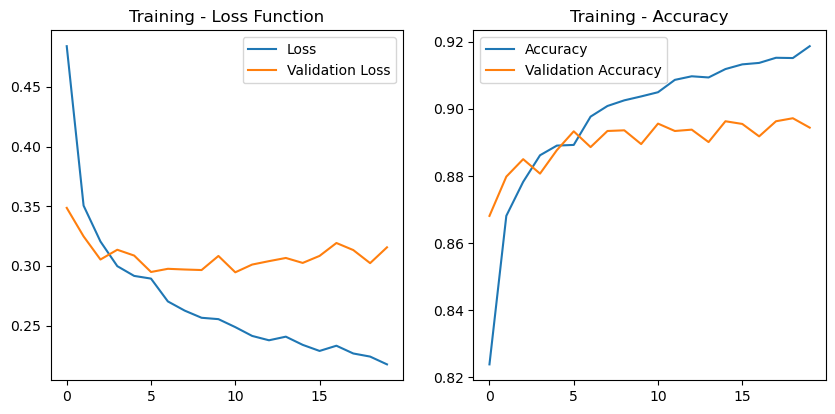

In [375]:
# Plotting the loss function and accuracy 

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training - Accuracy')

By plotting the graphs of Loss Function and Accuracy according to the number of Epochs, we observed that the accuracy of the new model increases as the number of Epochs increases.

The loss function also decreases as Epochs increases.

In [376]:
# # Final evaluation of the model
scores = new_model.evaluate(X_test, y_test, verbose=0)
print("Loss: {:.4f}".format(scores[0]))
print("Accuracy: {:.4f}".format(scores[1]))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Loss: 0.3156
Accuracy: 0.8944
CNN Error: 10.56%


By evaluating the test data using the new model with hypertuned parameters, the final accuracy is 89.4% with a CNN Error of 10.56%.

In [355]:
y_pred = new_model.predict(X_test)
y_preds = y_pred.argmax(axis=1)

313/313 [==============================] - 3s 10ms/step


In [377]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_tests = y_test.argmax(axis=1)

In [378]:
cm = confusion_matrix(y_tests,y_preds)

<AxesSubplot:>

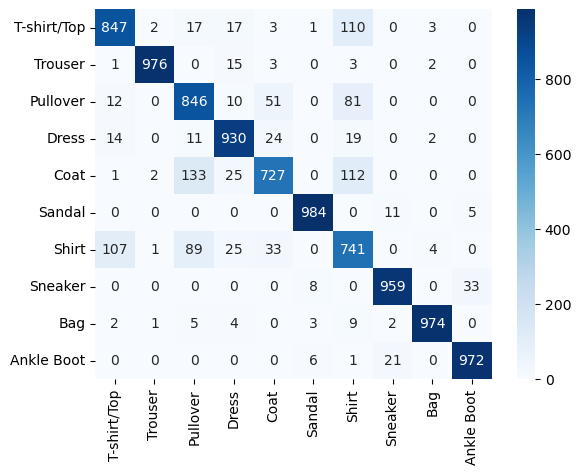

In [379]:
import seaborn as sns

labels = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

sns.heatmap(cm, annot=True, 
            fmt='.0f', cmap='Blues', xticklabels=labels, yticklabels=labels)

We can observed the number of accurate and inaccurate predictions for the classfication of fashion items using Confusion Matrix and Heatmap plot.

It is observed that there are high number of accurate predictions for each fashion items.

However, we also note that there are a number inaccurate predictions between Shirt, T-shirt, Coat and Pullover. This is likely because the shape of Shirt, T-shirt, Coat and Pullover are similar to one another. As such, it is harder to make an accurate predictions between these 4 items.

In conclusion, the model built has a good accuracy of ~90% and is effective in predicting Fashion items from the MNIST dataset.